In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import plotly.express as px
from sklearn import neighbors

In [64]:
# np.random.random()
feature_1 = [np.random.random() for i in range(100)]
feature_2 = [np.random.random() for i in range(100)]
# print(feature_1)

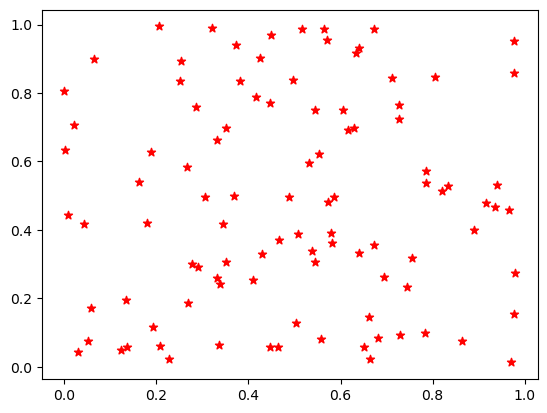

In [65]:
df = pd.DataFrame({'feature_1': feature_1, 'feature_2': feature_2})
plt.scatter(x=df.feature_1, y=df.feature_2, marker='*', c='red')

In [66]:
for i in range(100):
    feature_1.append(np.random.random() + .0)
    feature_2.append(np.random.random() + .0)

,feature_1,feature_2,color
0,0.345696,0.417539,C0
1,0.290763,0.290879,C0
2,0.863140,0.076095,C0
3,0.286992,0.759230,C0
4,0.729971,0.093839,C0
...,...,...,...
195,0.117782,0.362548,C1
196,0.883973,0.800579,C1
197,0.750171,0.536902,C1
198,0.614862,0.901658,C1


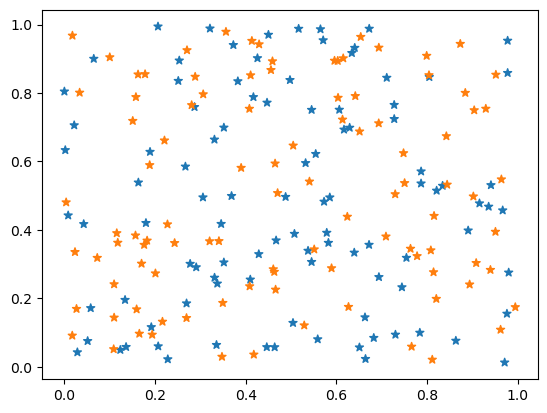

In [67]:
df = pd.DataFrame({'feature_1': feature_1, 'feature_2': feature_2, 'color': ['C0' if x < 100 else 'C1' for x in range(200)]})
plt.scatter(x=df.feature_1, y=df.feature_2, marker='*', c=df.color)
df

In [68]:
# df.iloc[200] = [1.1, .7, 'C2']

In [69]:
df.loc[200, 'feature_1'] = .7
df.loc[200, 'feature_2'] = .6
# plt.scatter(x=df.feature_1, y=df.feature_2, marker='*', c=df.color)


In [70]:
# len(train)

In [71]:
train = df.iloc[:-1]
test = df.iloc[-1]

closest_dist = 999999
closest_label = -1

for row in train.values:
    # print(row)
    dist = (row[0] - test.feature_1) ** 2 + (row[1] - test.feature_2) ** 2
    if dist < closest_dist:
        closest_dist = dist
        closest_label = row[2]
print(dist, closest_label)

0.16665715906368034 C1


In [86]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)
train = df.iloc[:190]
test = df.iloc[190:]

features = ['feature_1', 'feature_2']
labels = ['color']

model.fit(train[features].values, train[labels].values)

c:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [73]:
# train[features].values

In [74]:
# model.score(test[features].values, test[labels].values)

In [75]:
model.predict_proba([[.4, .6]])

array([[0.33333333, 0.66666667]])

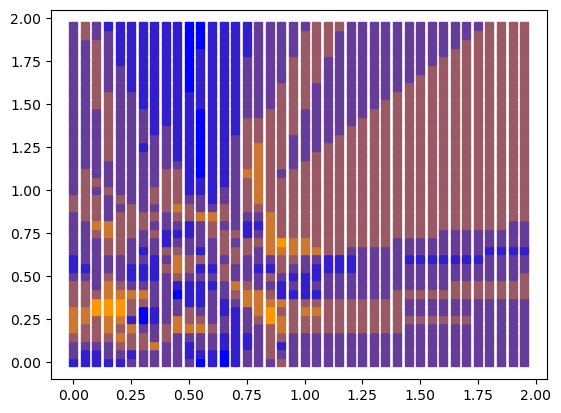

In [87]:
blue = np.array([0, 0, 255])
orange = np.array([255, 150, 0])
points_range = 2
step = .05

plt.scatter([], [])
for x in np.arange(0, points_range, step):
    for y in np.arange(0, points_range, step=step):
        p = model.predict_proba(np.array([x, y]).reshape(1, -1))
        c = p[0][0] * blue + p[0][1] * orange
        plt.plot(x, y, marker='s', ls='none', color=c/255)

plt.show()
        

In [77]:
# plt.savefig('knn test random param result')